Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple
import matplotlib

from brokenaxes import brokenaxes

# Formatting

Matplotlib parameters

In [2]:
plt.rcParams.update({
    # Fonts - Times, 8-12 pt
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times"],
    "font.size": 12,                  # Base size 8-12 pt
    # Axes
    "axes.titlesize": 12,             # Axis title size
    "axes.labelsize": 12,             # Axis label size
    "axes.labelweight": "normal",     # Normal weight
    "axes.titleweight": "normal",     # Normal weight for titles
    # Ticks
    "xtick.labelsize": 9,             # X tick label size (8-12)
    "ytick.labelsize": 9,             # Y tick label size (8-12)
    "xtick.direction": "in",          # Tick direction
    "ytick.direction": "in",          # Tick direction
    # Legends
    "legend.fontsize": 12,            # Legend text size (8-12)
    "legend.title_fontsize": 12,      # Legend title size (8-12)
    "legend.loc": 'best',             # Automatic location
    # Resolution
    "figure.dpi": 500,                # Display DPI
    "savefig.dpi": 500,               # Save DPI (300-600)
    "savefig.bbox": "tight",          # Crop whitespace
    # Without LaTeX
    "text.usetex": False,             # PLOS does not accept LaTeX EPS
    "mathtext.fontset": "dejavuserif",# Match math fonts to serif
})

Colors

In [3]:
## Reusable color utility
# I use this one
import numpy as np
import matplotlib.pyplot as plt

def make_color_map(values, cmap, vmin=0.25, vmax=1.0):
    '''
    Function that takes array of values and make a colormap for them
    '''
    values_sorted = sorted(values)
    colors = cmap(np.linspace(vmin, vmax, len(values)))
    return dict(zip(values_sorted, colors))

# To be given value
v_rest = [-22, -17, -12.3, -8.5]
pqif_vector = [0, 0.25, 0.5, 0.75, 1]

# Make colors once
color_map_vrest = make_color_map(v_rest, plt.cm.Reds)  # Reds for vrest
color_map_pqif = make_color_map(pqif_vector[1:-1], plt.cm.Greens)  # Greens for pqif

# Explicit endpoints for pqif
color_map_pqif[pqif_vector[0]] = 'black'
color_map_pqif[pqif_vector[-1]] = 'steelblue'


# Store values for plotting
Here I take out all the data I am interested in from the file system, and store it in a dedicated dataframe and dictionary. I make a dataframe with all values associated with a connectivity matrix and an ID, and a dictionary mapping ID to an array storing the weights (flattened). I do this so that I can loop through and plot everything from it in one go.

In [53]:
import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########

vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = [10.74]
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
seed_number = [i for i in range(0, 1)] 


########## Dataframe and dictionary ##########

rows = []  # Container for rows of dataframe
weights_dict = {}  # Dictionary for weight arrays

for dyn in dynamics:

    # Simulation number corresponding to dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    for sim, vr, f in zip(simulation_number, vrest, slope):
        for pqif in pqif_number:
            for seed in seed_number:
                # Loop through simulations of pqif across seeds


                dataframe_title = f'{dyn}\simulation_{sim}\simulation_{sim}_connectivity_matrix\simulation_{sim}_connectivity_pqif_{pqif}_iloop_11_seed_{seed}' # load dataframe

                simulation_id = f'{dyn}_{sim}_{pqif}_{seed}'  # Shared across dataframe and dictionary

                try:  # Notify if something did not exist
                    weights_df = pd.read_csv(dataframe_title, header=None).values
                except FileNotFoundError:
                    print(f"File not found: {dataframe_title}, will be skipped.")
                    continue  # Go to next iteration


                # Flatten to 1D array
                weights = weights_df.flatten()

                # Standard deviation and mean of weights for current seed of vrest/slope and pqif
                sd = np.std(weights)
                mean = np.mean(weights)


                row = [simulation_id, dyn, sim, vr, f, pqif, seed, sd, mean]  # Store all data associated with the connectivity matrix + a simulationID to the weights in dictionary
                rows.append(row)  # Append row to what becomes the dataframe later

                weights_dict[simulation_id] = weights  # Dictionary mapping simulationID to weight array


########## Make dataframe ##########

columns = ['simulationID', 'dynamic', 'simulation', 'vrest', 'slope', 'pqif', 'seed', 'standard deviation', 'mean']
df = pd.DataFrame(rows, columns=columns)


########## Make a copy of dataframe for further use ##########

wDF = df.copy()

########## Print statements to control ##########
print(wDF.head())
print(wDF.tail())
print(weights_dict)
# for i in weights_dict.items():
#     print(i)

            simulationID       dynamic  simulation  vrest  slope  pqif  seed  \
0     oscillations_1_0_0  oscillations           1   -8.5  14.44  0.00     0   
1  oscillations_1_0.25_0  oscillations           1   -8.5  14.44  0.25     0   
2   oscillations_1_0.5_0  oscillations           1   -8.5  14.44  0.50     0   
3  oscillations_1_0.75_0  oscillations           1   -8.5  14.44  0.75     0   
4     oscillations_1_1_0  oscillations           1   -8.5  14.44  1.00     0   

   standard deviation      mean  
0            0.261575  0.000011  
1            0.256716 -0.000485  
2            0.258017 -0.000418  
3            0.273411  0.000226  
4            0.301593 -0.000113  
           simulationID    dynamic  simulation  vrest  slope  pqif  seed  \
35     sequences_12_0_0  sequences          12  -22.0   7.18  0.00     0   
36  sequences_12_0.25_0  sequences          12  -22.0   7.18  0.25     0   
37   sequences_12_0.5_0  sequences          12  -22.0   7.18  0.50     0   
38  sequenc

# Figures

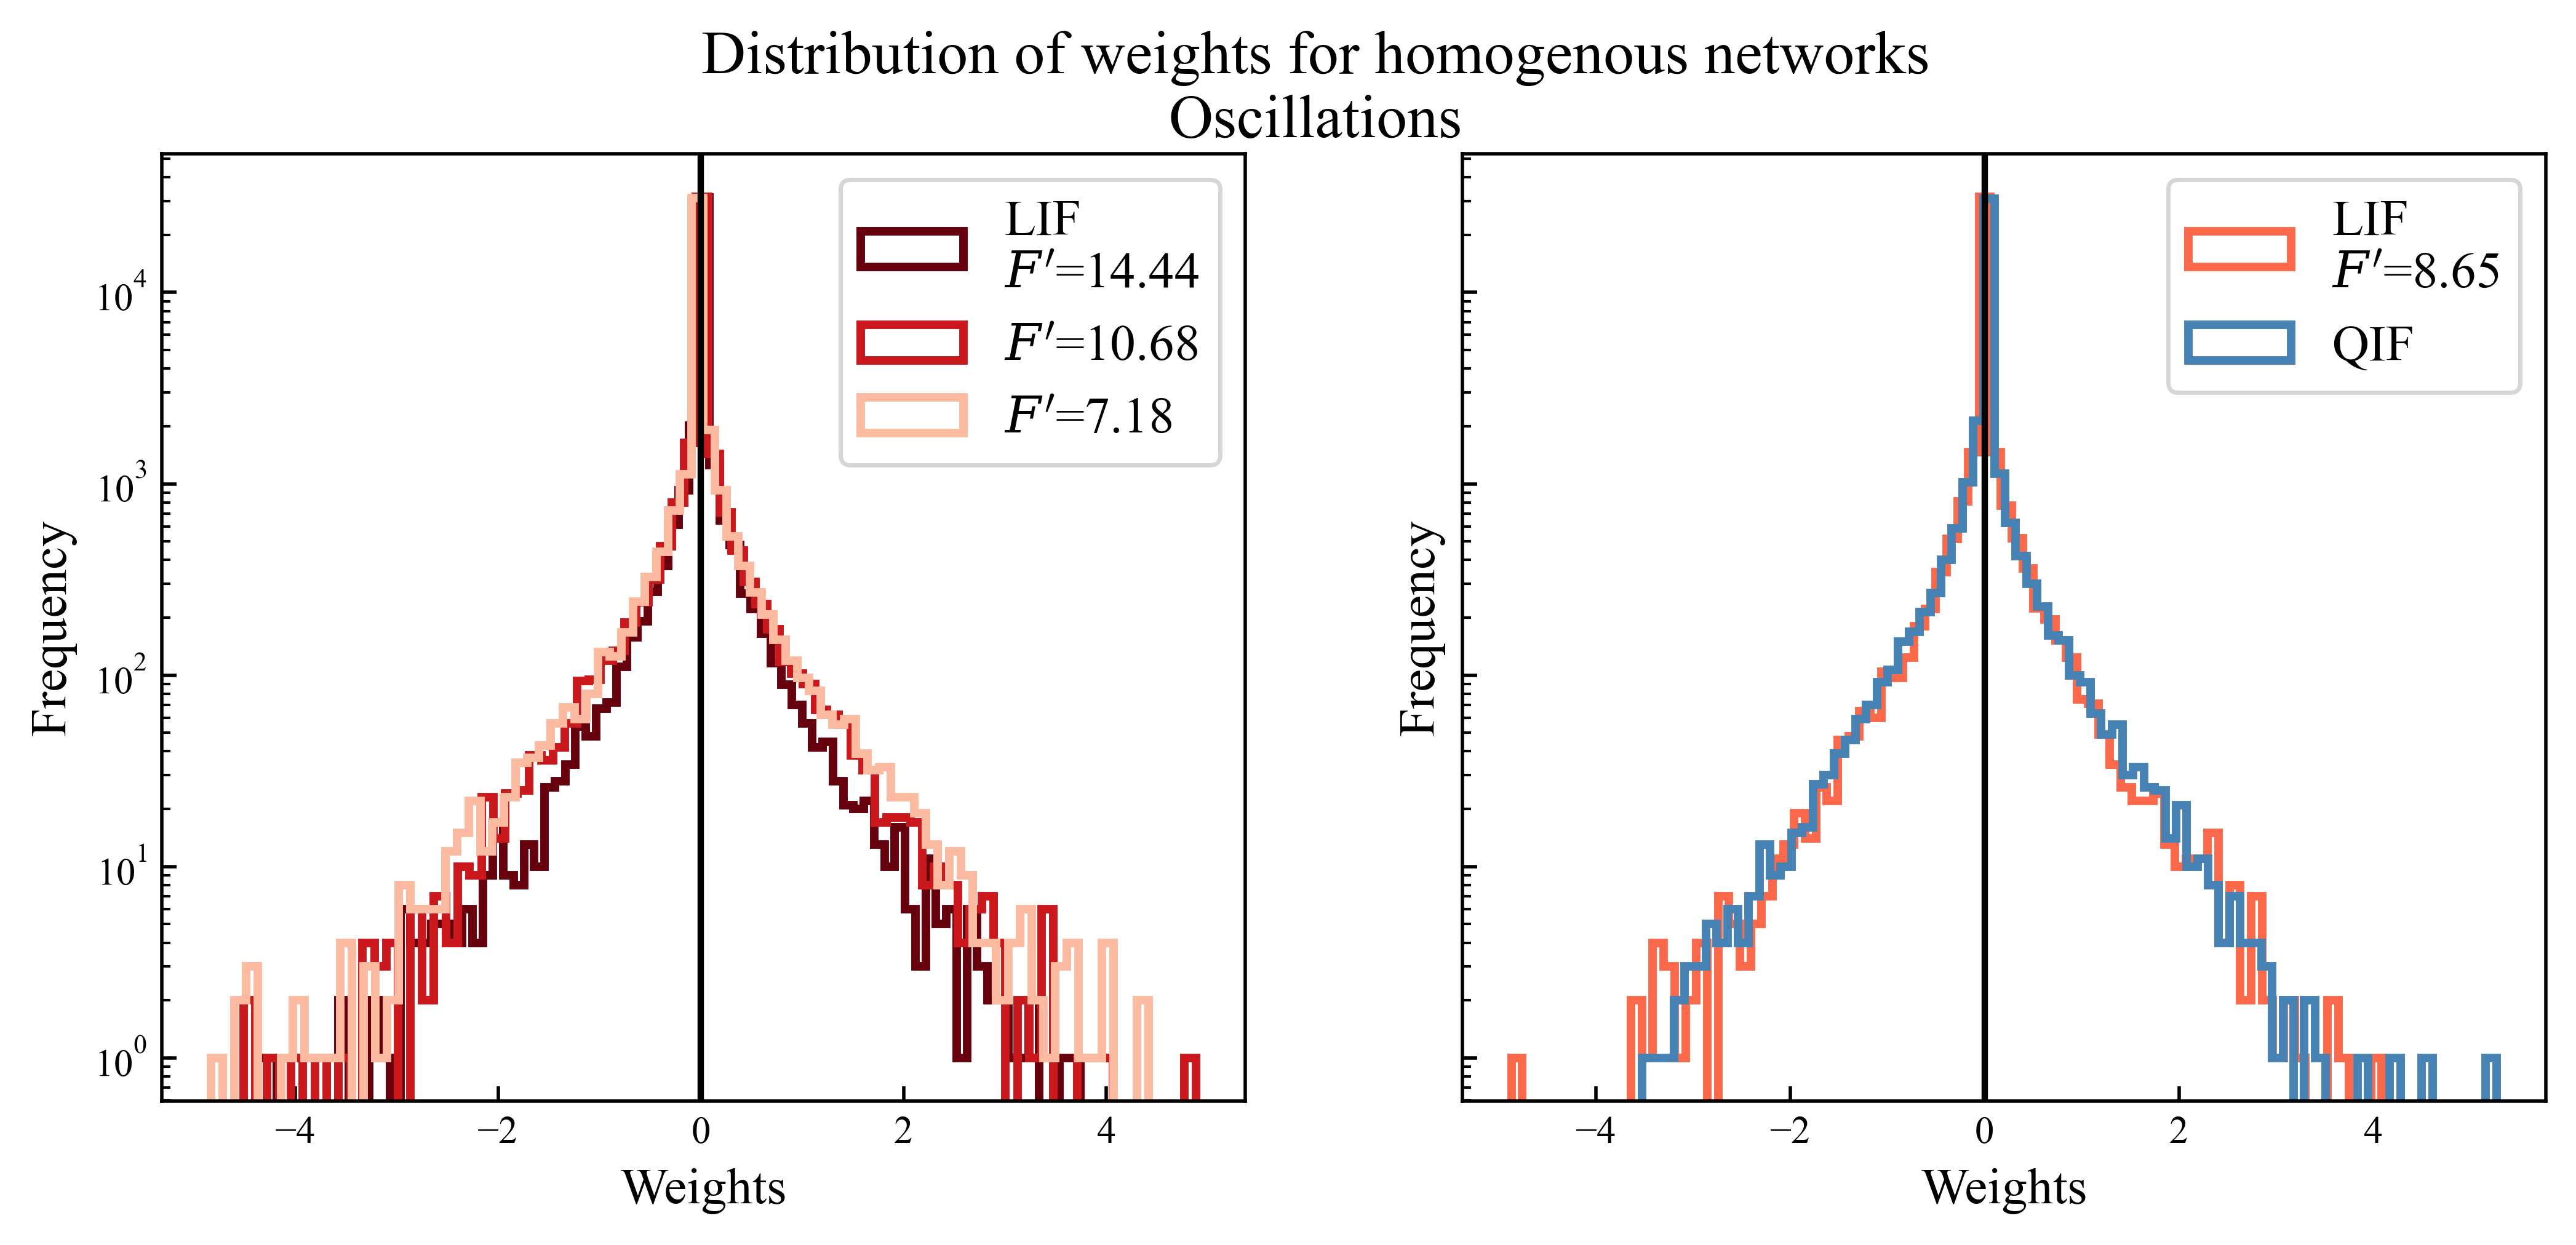

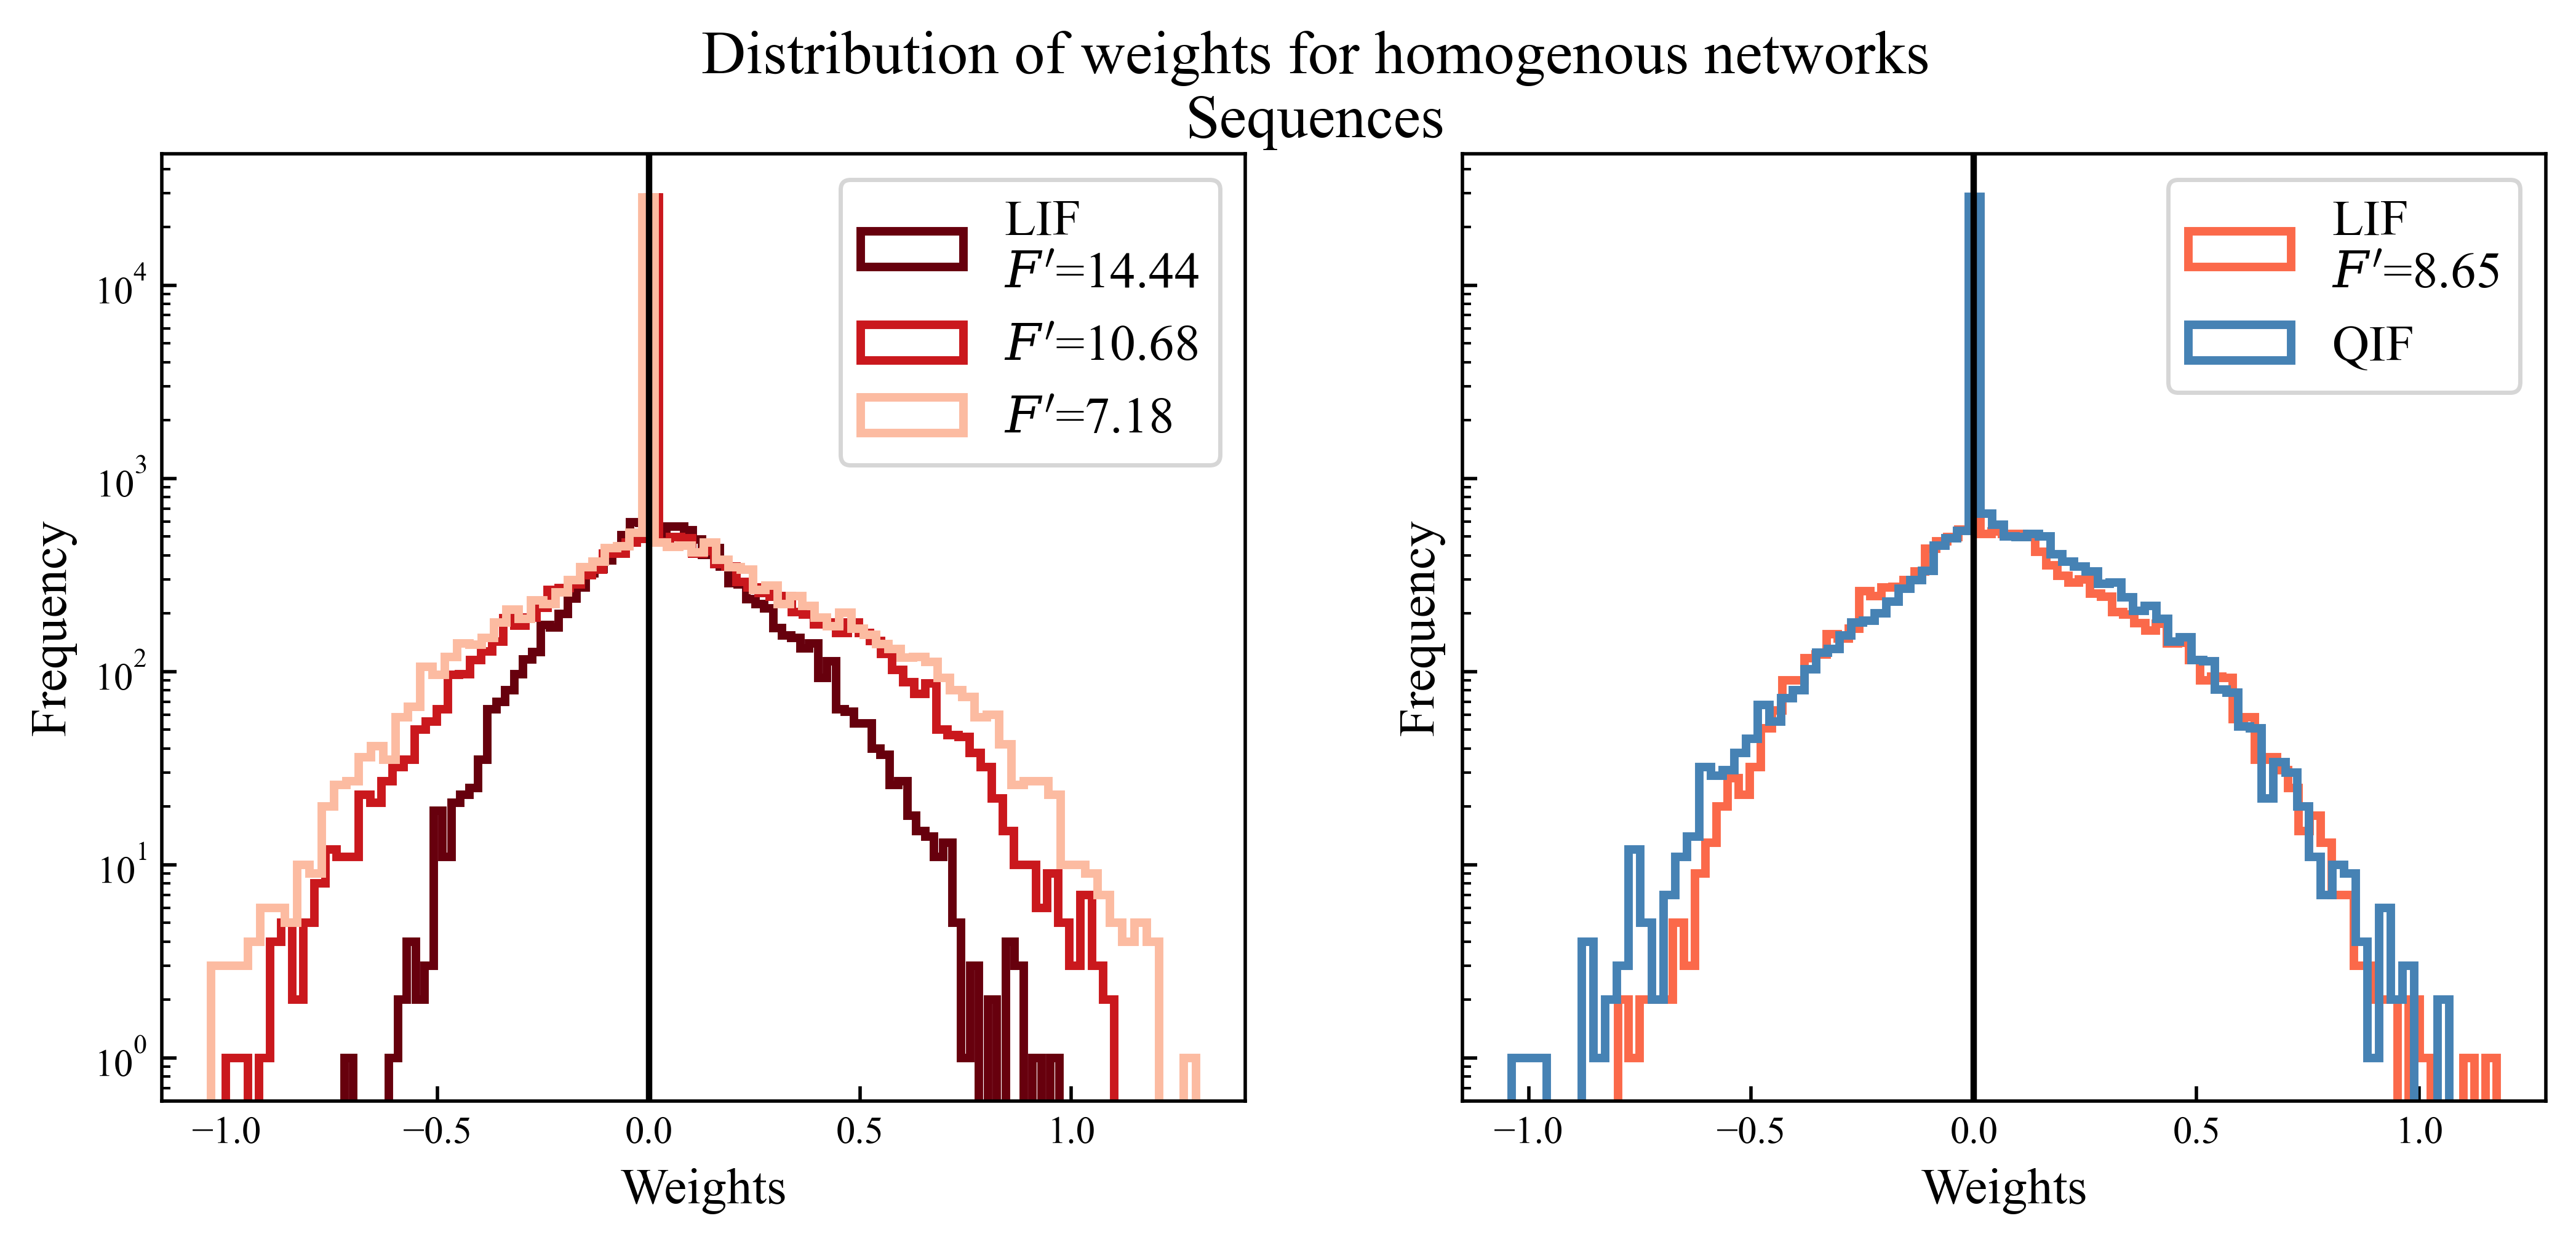

In [ ]:
# ========== Histogram of weight distribution for homogenous networks ==========

import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = [10.74]
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
seed_number = [i for i in range(0, 1)] 

########## Figure loop ##########
for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    #### Create figure and axes

    fig, (ax1, ax2) = plt.subplots(
        nrows=1, ncols=2,
        figsize=(10,4),  # TODO review
        sharey=True
    )

    # ax_map = {
    #     'A': axes[0],
    #     'B': axes[1],
    # }

    for sim, vr, f in zip(simulation_number, vrest, slope):
        for pqif in pqif_homogenous:
            for seed in seed_number:

                #### Take out values to plot

                df_filtered = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == pqif) & (wDF['seed'] == seed)]  # Current row of dataframe with metadata

                ID = df_filtered['simulationID'].item()  # Simulation ID

                current_weights = weights_dict[ID]  # Weight array (flattened)


                #### Color formatting

                if pqif == 1:
                    colors = 'steelblue'
                else:
                    colors = color_map_vrest[vr]


                #### Figure control flow

                if pqif == 0 and f in [14.44, 10.68, 7.18]:  # Left

                    if sim == simulation_number[0]:  # LIF header in legend
                        label = f"LIF\n$F'$={f}"
                    else:
                        label = f"$F'$={f}"

                    ax1.hist(current_weights, bins=80, log=True, color=colors, alpha=1, linewidth=2, histtype='step', label=label)
                    
                elif f == 8.65:  # Right
                    if pqif == 0:
                        label = f"LIF\n$F'$={f}"
                    else:
                        label = 'QIF'

                    ax2.hist(current_weights, bins=80, log=True, color=colors, alpha=1, linewidth=2, histtype='step', label=label)

                else:  # Ignore others
                    continue


    #### Shared formatting
    plt.suptitle(f"Distribution of weights for homogenous networks\n{dyn.capitalize()}")
    for ax in (ax1, ax2):
        ax.legend()
        ax.set_xlabel("Weights")
        ax.set_ylabel("Frequency")
        ax.axvline(0, color="black")
    plt.show()

In [95]:
import matplotlib
print(matplotlib.__version__)

3.10.5
